# Plant Disease Detection using CNN on Plant Village
## Import Libraries and configure directories

In [ ]:
import os
import shutil
import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hinnatariq","key":"f71450845bb4174cd794ef1643d71780"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset
!unzip /content/plantvillage-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce73b___UF.GRC_YLCV_Lab 02727_final_mas

In [ ]:
!kaggle datasets download -d abdulhasibuddin/plant-doc-dataset
!unzip /content/plant-doc-dataset.zip


100% 882M/882M [00:27<00:00, 43.2MB/s]
100% 882M/882M [00:27<00:00, 33.1MB/s]
Archive:  /content/plant-doc-dataset.zip
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (1).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (10).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (2).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (3).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (4).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (5).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (6).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (7).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (8).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (9).jpg  
  inflating: PlantDoc-Dataset/test/Apple leaf/Apple leaf (1).jpg  
  inflating: PlantDoc-Dataset/test/Apple le

In [ ]:
import os

def count_images_in_directory(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                count += 1
    return count

# Paths to the datasets
plant_village_dir = "/content/plantvillage dataset/color"
plant_doc_dir = "/content/PlantDoc-Dataset/train"
dataset_dir = "/content/dataset"

# Check if the directory doesn't exist, then create it
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)
    print(f"Directory '{dataset_dir}' created successfully.")
else:
    print(f"Directory '{dataset_dir}' already exists.")

# Count the number of images in each dataset directory
num_images_plant_village = count_images_in_directory(plant_village_dir)
num_images_plant_doc = count_images_in_directory(plant_doc_dir)

print(f"Number of images in PlantVillage dataset: {num_images_plant_village}")
print(f"Number of images in PlantDoc dataset: {num_images_plant_doc}")


Directory '/content/dataset' created successfully.
Number of images in PlantVillage dataset: 54305
Number of images in PlantDoc dataset: 2316


Directory '/content/dataset' already exists.
Number of images in PlantVillage dataset: 1500
Number of images in PlantDoc dataset: 2314
PlantVillage dataset:
PlantDoc dataset:


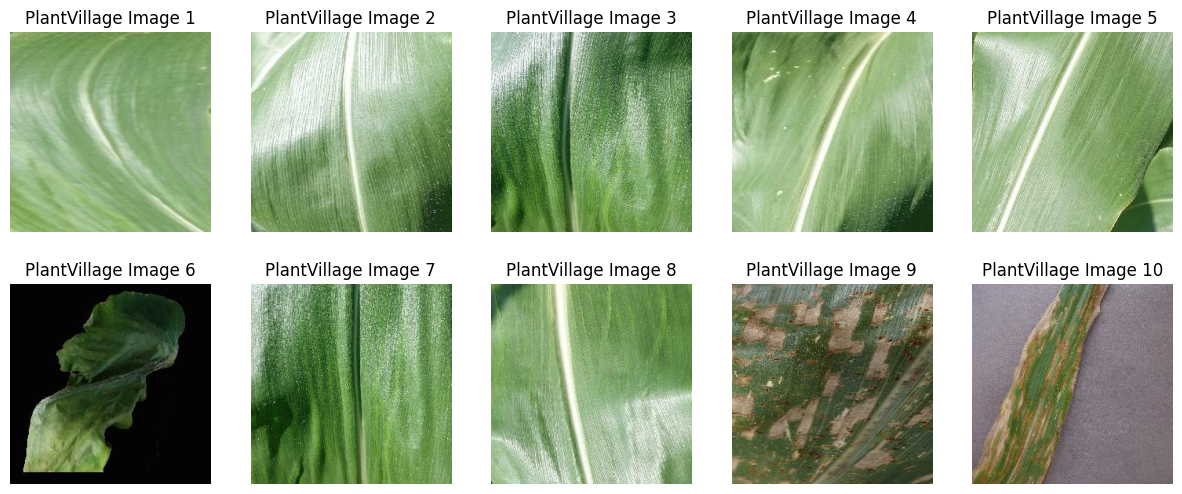

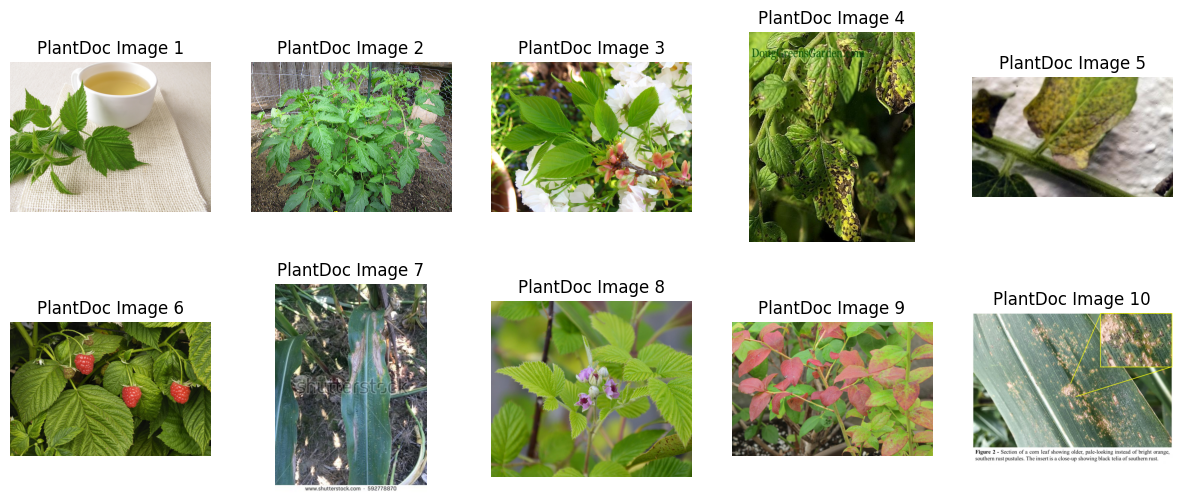

In [ ]:
!pip install imageio
from IPython.display import display, Image
import os
import random
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio  # Explicitly using v2 to avoid DeprecationWarning

def count_images_in_directory(directory):
    pattern = os.path.join(directory, '*/*.jpg')  # Assuming images are in subdirectories
    image_files = glob(pattern)
    return len(image_files)

def display_random_images(dataset_path, dataset_name, num_images=10, image_size=(150, 150)):
    pattern = os.path.join(dataset_path, '*/*.jpg')  # Assuming images are in subdirectories
    image_files = glob(pattern)

    # Select random images
    random_images = random.sample(image_files, min(num_images, len(image_files)))

    # Calculate the number of rows and columns dynamically
    num_rows = int(np.ceil(num_images / 5))
    num_cols = min(num_images, 5)

    # Display the images with dataset name
    print(f"{dataset_name} dataset:")
    plt.figure(figsize=(15, 6))
    for i, image_path in enumerate(random_images):
        img_data = imageio.imread(image_path).astype(np.float32)  # Convert image data to float
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img_data / 255.0)  # Normalize pixel values
        plt.title(f"{dataset_name} Image {i + 1}")  # Set individual image title
        plt.axis('off')

# Paths to the datasets
plant_village_dir = "/content/plantvillage dataset/color"
plant_doc_dir = "/content/PlantDoc-Dataset/train"
dataset_dir = "/content/dataset"

# Check if the directory doesn't exist, then create it
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)
    print(f"Directory '{dataset_dir}' created successfully.")
else:
    print(f"Directory '{dataset_dir}' already exists.")

# Count the number of images in each dataset directory
num_images_plant_village = count_images_in_directory(plant_village_dir)
num_images_plant_doc = count_images_in_directory(plant_doc_dir)
print(f"Number of images in PlantVillage dataset: {num_images_plant_village}")
print(f"Number of images in PlantDoc dataset: {num_images_plant_doc}")

# Display 10 random images in an auto-adjusted layout
display_random_images(plant_village_dir, "PlantVillage", num_images=10)

# Display 10 random images in an auto-adjusted layout
display_random_images(plant_doc_dir, "PlantDoc", num_images=10)

plt.show()


In [ ]:
plant_village_dir = "/content/plantvillage dataset/color"
plant_doc_dir = "/content/PlantDoc-Dataset/train"
dataset_dir = "/content/dataset"

# Check if the directory doesn't exist, then create it
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)
    print(f"Directory '{dataset_dir}' created successfully.")
else:
    print(f"Directory '{dataset_dir}' already exists.")


Directory '/content/dataset' already exists.


In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

batch_size = 16

## Neural Network
### The Neural Network Architecture
1. **Rescaling Layer (Normalization)**:
   - Input Shape: (224, 224, 3)
   - Function: This layer scales the input pixel values to a range between 0 and 1 by dividing each pixel value by 255. This step is often used to ensure that the neural network's initial weights are in a reasonable range and can help improve training.

2. **Convolutional Layers (Conv2D)**:
   - Conv2D(32, (3,3), activation='relu'):
     - This layer uses 32 filters (also called kernels) of size 3x3 to extract features from the input.
     - Activation: ReLU (Rectified Linear Unit) is used as the activation function, which introduces non-linearity.
     - These convolutional layers are responsible for learning various low-level and mid-level features in the images.

3. **MaxPooling Layers (MaxPool2D)**:
   - MaxPool2D((2,2)):
     - Max pooling reduces the spatial dimensions of the feature maps obtained from the convolutional layers by taking the maximum value from a 2x2 window.
     - It helps reduce the computational complexity and increases the network's ability to focus on the most important features.

4. **Dropout Layers**:
   - Dropout(0.2):
     - This layer randomly "drops out" (sets to zero) 20% of the output units during training. It helps prevent overfitting by introducing noise and ensuring that the network doesn't rely too heavily on any one feature.

5. **Flatten Layer**:
   - Function: This layer takes the output from the previous layers and flattens it into a 1D vector. This prepares the data for the fully connected layers.

6. **Fully Connected Layers (Dense)**:
   - Dense(128, activation='relu'):
     - This layer consists of 128 neurons and applies the ReLU activation function. It helps to learn high-level features and patterns in the data.
   - Dense(64, activation='relu'):
     - Another dense layer with 64 neurons and ReLU activation.
   - Dense(38, activation='sigmoid'):
     - The final dense layer with 38 neurons. It uses the sigmoid activation function, which is typical for multi-label classification problems. Each neuron in this layer represents one of the 38 possible classes. The sigmoid function scales the output between 0 and 1, allowing for multi-label classification.

In [ ]:
model = keras.Sequential([
    keras.layers.Rescaling(scale=1/255, input_shape=(224, 224, 3)),

    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(38, activation='sigmoid')
])

# Print information about convolutional layers
for layer in model.layers:
    if isinstance(layer, keras.layers.Conv2D):
        print(f"Convolutional Layer: {layer.name}, Filters: {layer.filters}, Kernel Size: {layer.kernel_size}")


Convolutional Layer: conv2d_10, Filters: 32, Kernel Size: (3, 3)
Convolutional Layer: conv2d_11, Filters: 64, Kernel Size: (3, 3)
Convolutional Layer: conv2d_12, Filters: 64, Kernel Size: (3, 3)
Convolutional Layer: conv2d_13, Filters: 64, Kernel Size: (3, 3)
Convolutional Layer: conv2d_14, Filters: 128, Kernel Size: (3, 3)


**Activation maps extracted from the first convolutional layer**

---



1/1 [==============================] - 0s 124ms/step


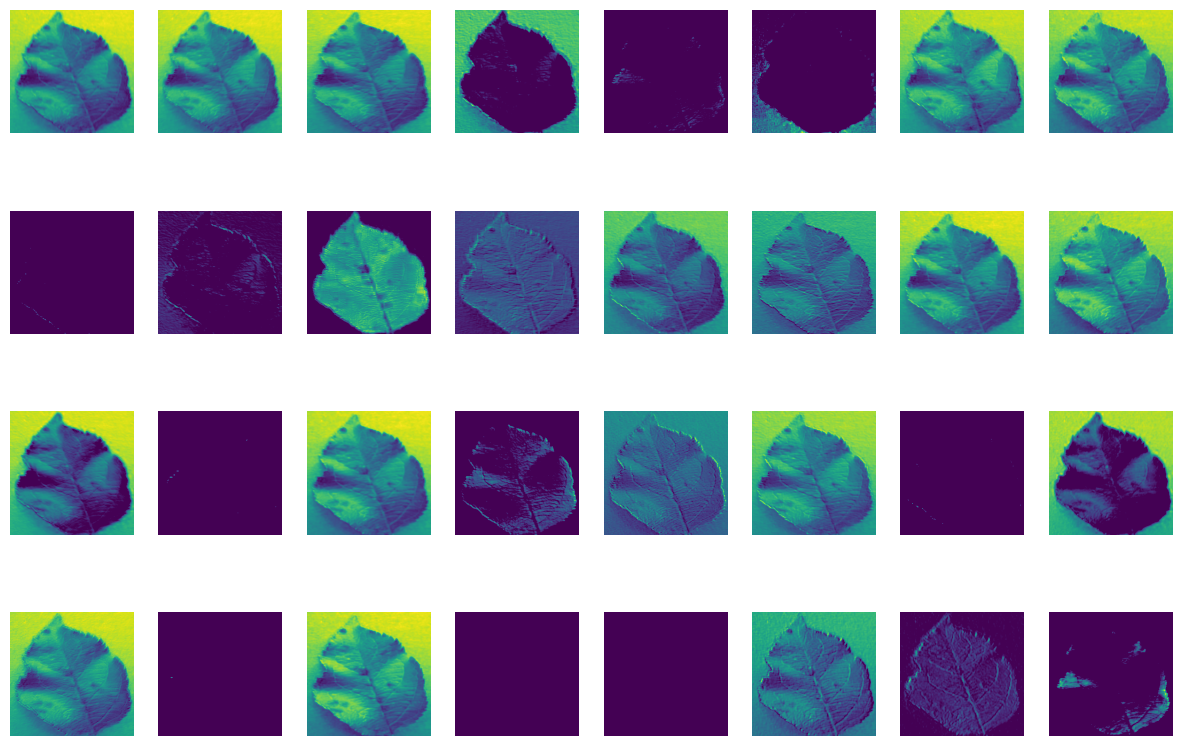

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Get the first convolutional layer
conv_layer = None
for layer in model.layers:
    if isinstance(layer, keras.layers.Conv2D):
        conv_layer = layer
        break

# Check if a Conv2D layer is found
if conv_layer is not None:
    # Create a model that outputs the activations from the first convolutional layer
    activation_model = Model(inputs=model.inputs, outputs=conv_layer.output)

    # Load the example image
    image_path = "/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"
    sample_image = Image.open(image_path).resize((224, 224))

    # Convert the image to a numpy array
    input_image = np.array(sample_image)[np.newaxis, ...] / 255.0  # Normalize pixel values to [0, 1]

    # Get the activations for the input image
    activations = activation_model.predict(input_image)

    # Visualize the activation maps
    plt.figure(figsize=(15, 10))
    for i in range(activations.shape[-1]):  # Visualize all filters in the layer
        plt.subplot(4, 8, i + 1)
        plt.imshow(activations[0, :, :, i], cmap='viridis')
        plt.axis('off')

    plt.show()
else:
    print("No Conv2D layer found in the model.")


**Activation maps extracted from the third convolutional layer**

1/1 [==============================] - 0s 367ms/step


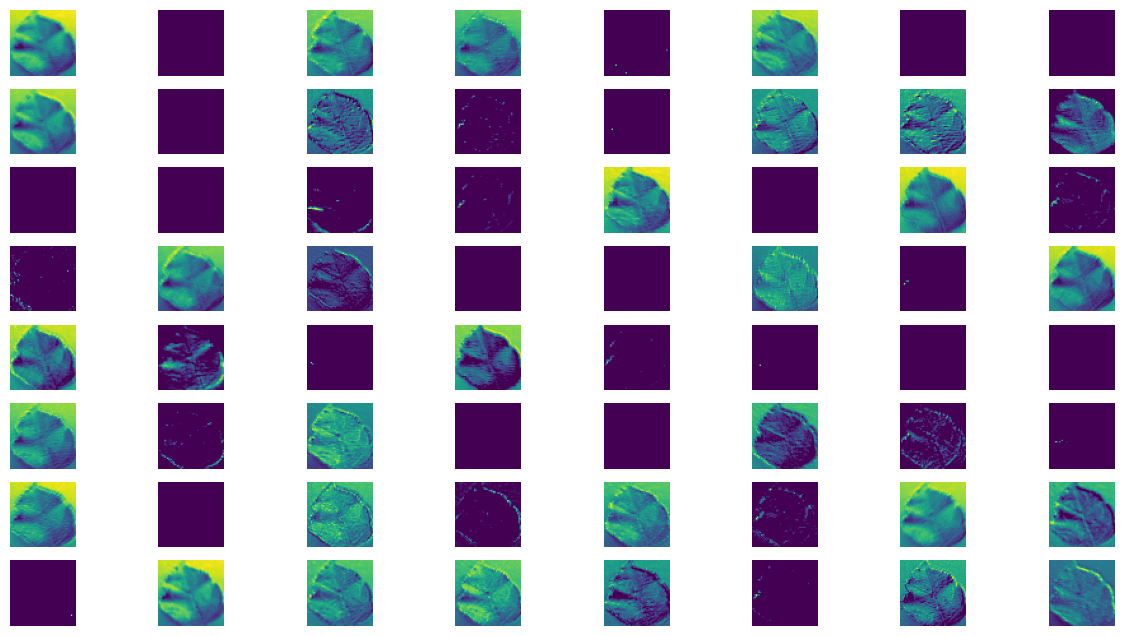

In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Extract the "conv2d_12" layer
conv_layer_name = 'conv2d_12'
conv_layer = model.get_layer(conv_layer_name)

# Create a model that outputs the activations from the "conv2d_12" layer
activation_model = Model(inputs=model.inputs, outputs=conv_layer.output)

# Load the example image
image_path = "/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"
sample_image = Image.open(image_path).resize((224, 224))

# Convert the image to a numpy array
img_array = np.array(sample_image)

# Add an extra dimension to the image (batch dimension)
img_array = np.expand_dims(img_array, axis=0)

# Get the activations for the input image
activations = activation_model.predict(img_array)

# Visualize the activation maps
plt.figure(figsize=(15, 8))
for i in range(64):  # Assuming the "conv2d_12" layer has 64 filters
    plt.subplot(8, 8, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()


**Activation maps extracted from the fith convolutional layer**

1/1 [==============================] - 0s 367ms/step


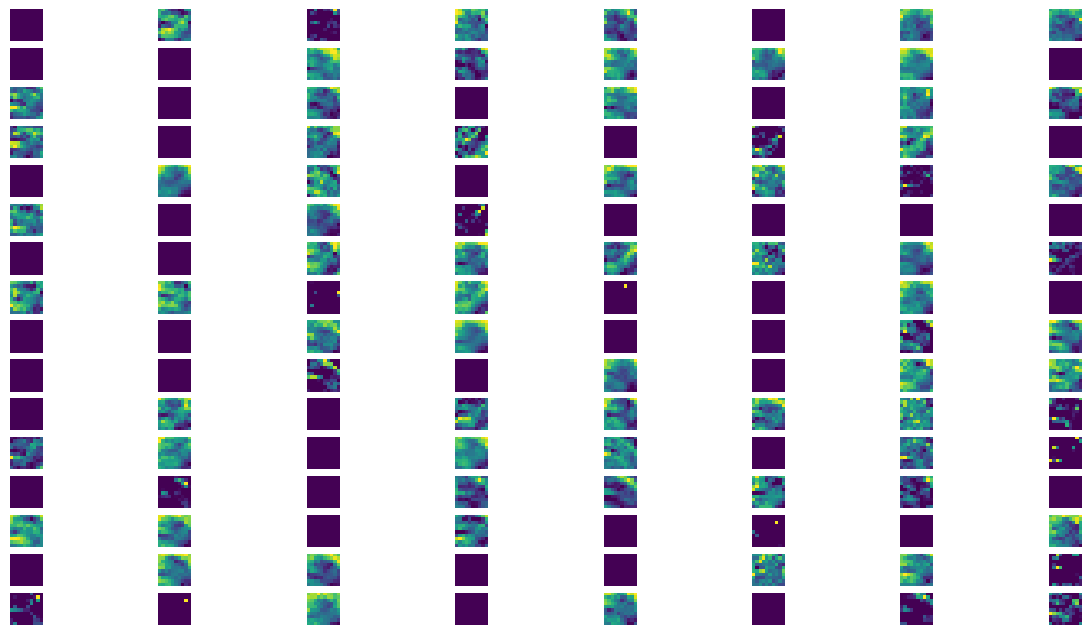

In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Extract the "conv2d_14" layer
conv_layer_name = 'conv2d_14'
conv_layer = model.get_layer(conv_layer_name)

# Create a model that outputs the activations from the "conv2d_14" layer
activation_model = Model(inputs=model.inputs, outputs=conv_layer.output)

# Load the example image
image_path = "/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"
sample_image = Image.open(image_path).resize((224, 224))

# Convert the image to a numpy array
img_array = np.array(sample_image)

# Add an extra dimension to the image (batch dimension)
img_array = np.expand_dims(img_array, axis=0)

# Get the activations for the input image
activations = activation_model.predict(img_array)

# Visualize the activation maps
plt.figure(figsize=(15, 8))
for i in range(128):  # Assuming the "conv2d_14" layer has 128 filters
    plt.subplot(16, 8, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()


**The first seven filters of the first convolutional layer**

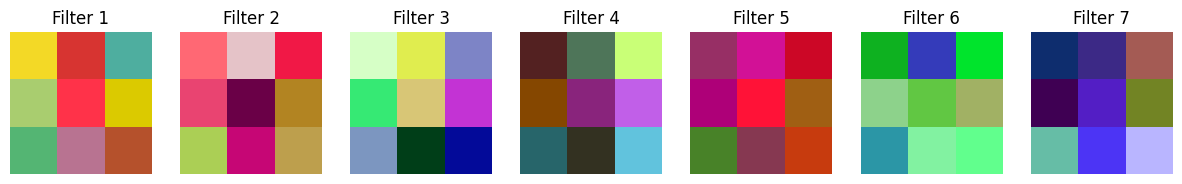

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first Conv2D layer
conv_layer = model.layers[1]  # Assuming the Conv2D layer is the second layer in the model

# Get the filters
filters = conv_layer.get_weights()[0]

# Reshape filters to 2D array (height * width * channels, number of filters)
filters_reshaped = filters.reshape(-1, filters.shape[3])

# Choose the number of filters to visualize (in this case, the first 7)
num_filters_to_visualize = 7
filters_to_visualize = filters_reshaped[:, :num_filters_to_visualize]

# Create a subplot for each filter
fig, axes = plt.subplots(1, num_filters_to_visualize, figsize=(15, 5))

# Visualize each filter
for i in range(num_filters_to_visualize):
    filter_image = filters_to_visualize[:, i].reshape(filters.shape[0], filters.shape[1], filters.shape[2])

    # Normalize pixel values to [0, 1]
    filter_image_normalized = (filter_image - filter_image.min()) / (filter_image.max() - filter_image.min())

    axes[i].imshow(filter_image_normalized, cmap='viridis')
    axes[i].axis('off')
    axes[i].set_title(f'Filter {i+1}')

plt.show()


### Optimizer (optimizer='adam'):
   - An optimizer is a critical component of the training process in neural networks. It defines the specific algorithm used to adjust the model's parameters (weights and biases) during training in order to minimize the chosen loss function.
   - 'Adam' stands for Adaptive Moment Estimation, and it is a popular optimization algorithm. It combines the benefits of both the Adagrad and RMSprop optimizers. Adam adjusts the learning rates for each parameter individually and maintains moving averages of the gradients.
   - The optimizer's role is to update the model's weights in a way that helps it converge to a solution that minimizes the loss function.

### Loss Function (loss='sparse_categorical_crossentropy')
   - The loss function, also known as the cost function or objective function, measures the difference between the predicted values and the actual target values during training.
   - 'Sparse Categorical Crossentropy' is a loss function commonly used in classification tasks, particularly when dealing with integer-encoded class labels. It calculates the cross-entropy between the predicted probability distribution (after applying a softmax activation) and the true class labels.
   - In this case, 'sparse' indicates that the class labels are integer values (e.g., 0, 1, 2) rather than one-hot encoded vectors.

### 3. Metrics (metrics='accuracy'):
   - Metrics are used to evaluate and monitor the performance of the model during training and testing.
   - 'Accuracy' is a commonly used metric for classification problems. It measures the proportion of correctly predicted samples to the total number of samples. In a multi-class classification task, accuracy calculates the ratio of correctly classified samples to the total number of samples.

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


Early stopping is a technique used during the training of neural networks to prevent overfitting and improve model generalization. It is based on a simple principle: if the model's performance on a validation dataset does not improve or worsens over a certain number of training epochs, training is halted to prevent the model from fitting the training data too closely. Let's explain the key components and the function of early stopping from first principles:

1. **Monitor ('val_loss')**:
   - The 'monitor' parameter specifies the metric that the early stopping algorithm should monitor to determine when to stop training. In this case, 'val_loss' is used, which means the validation loss is monitored. The validation loss is a measure of how well the model is performing on a separate validation dataset.

2. **Patience (patience=5)**:
   - The 'patience' parameter defines the number of epochs with no improvement in the monitored metric to wait before stopping the training process. If, for a specified number of consecutive epochs (in this case, 5), the validation loss doesn't decrease or improve, training is stopped. This is a mechanism to prevent the model from overfitting because further training might lead to worse generalization.

3. **Restore Best Weights (restore_best_weights=True)**:
   - When 'restore_best_weights' is set to 'True,' the early stopping callback will restore the model's weights to the best-performing state observed during training. This is essential because, during training, the model's weights might change in a way that leads to overfitting, but the best weights represent the model with the highest performance on the validation data. Restoring the best weights ensures that the model retains the best generalization ability.

To understand the function of early stopping, consider the training process:

- The model's performance on the validation dataset is continuously monitored.
- If, for the specified number of consecutive epochs (patience), the validation loss does not improve or starts to degrade, the training process is stopped early.
- By stopping training at this point, the model is prevented from overfitting, which can occur if it continues to fit the training data noise.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # You can use other metrics like 'val_accuracy'
    patience=5,          # Number of epochs with no improvement to wait
    restore_best_weights=True  # Restore the best model weights when early stopping
)

## Train the model with PlantVillage Dataset
In this data-set, 38 different classes of 54305 plant leafs are available.
The classes are,
1. Apple_scab
1. Apple_black_rot
1. Apple_cedar_apple_rust
1. Apple_healthy
1. Blueberry_healthy
1. Cherry_powdery_mildew
1. Cherry_healthy
1. Corn_gray_leaf_spot
1. Corn_common_rust
1. Corn_northern_leaf_blight
1. Corn_healthy
1. Grape_black_rot
1. Grape_black_measles
1. Grape_leaf_blight
1. Grape_healthy
1. Orange_haunglongbing
1. Peach_bacterial_spot
1. Peach_healthy
1. Pepper_bacterial_spot
1. Pepper_healthy
1. Potato_early_blight
1. Potato_healthy
1. Potato_late_blight
1. Raspberry_healthy
1. Soybean_healthy
1. Squash_powdery_mildew
1. Strawberry_healthy
1. Strawberry_leaf_scorch
1. Tomato_bacterial_spot
1. Tomato_early_blight
1. Tomato_healthy
1. Tomato_late_blight
1. Tomato_leaf_mold
1. Tomato_septoria_leaf_spot
1. Tomato_spider_mites_two-spotted_spider_mite
1. Tomato_target_spot
1. Tomato_mosaic_virus
1. Tomato_yellow_leaf_curl_virus

### Load the dataset

In [ ]:
train_ds, test_ds = keras.utils.image_dataset_from_directory(
    plant_village_dir ,
    image_size=(224,224),
    batch_size=32,
    seed = 123,
    validation_split=.2,
    subset='both'
)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


### Train the model

Epoch 1/5
1087/1087 [==============================] - 176s 133ms/step - loss: 1.0277 - accuracy: 0.7073 - val_loss: 1.0253 - val_accuracy: 0.7100
Epoch 2/5
1087/1087 [==============================] - 161s 142ms/step - loss: 0.4016 - accuracy: 0.8737 - val_loss: 0.5945 - val_accuracy: 0.8228
Epoch 3/5
1087/1087 [==============================] - 154s 133ms/step - loss: 0.2463 - accuracy: 0.9199 - val_loss: 0.6692 - val_accuracy: 0.8198
Epoch 4/5
1087/1087 [==============================] - 151s 131ms/step - loss: 0.1757 - accuracy: 0.9410 - val_loss: 0.5069 - val_accuracy: 0.8607
Epoch 5/5
1087/1087 [==============================] - 152s 132ms/step - loss: 0.1346 - accuracy: 0.9554 - val_loss: 0.2139 - val_accuracy: 0.9373


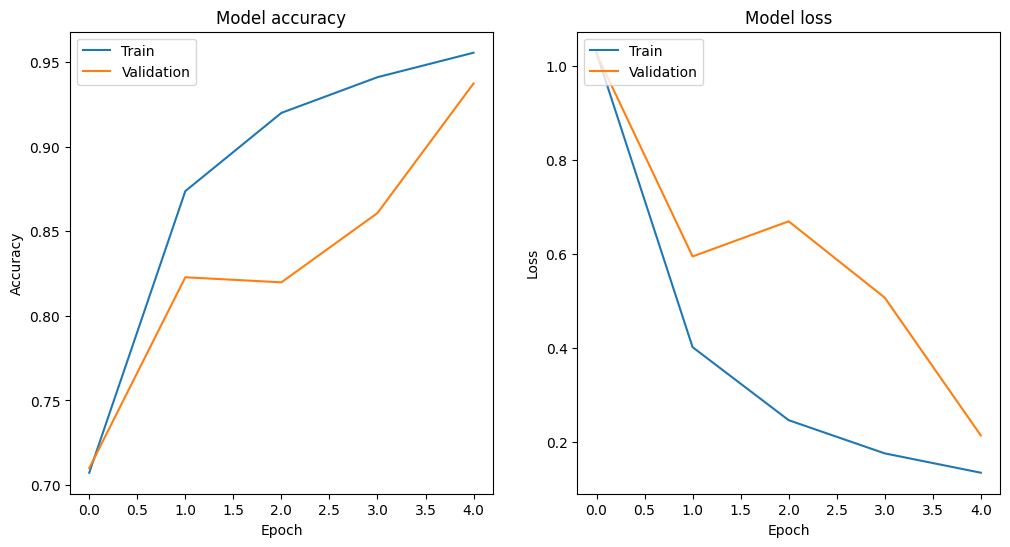

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'model' is your compiled model, and 'train_ds' is your training dataset

# Compile your model if not already compiled
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs
epochs = 5

# Split the training dataset into training and validation sets
validation_split = 0.2
num_samples = train_ds.cardinality().numpy()
val_samples = int(validation_split * num_samples)

val_ds = train_ds.take(val_samples)
train_ds = train_ds.skip(val_samples)

# Train the model and store the training history
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[early_stopping])

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### Evaluation

340/340 [==============================] - 15s 45ms/step


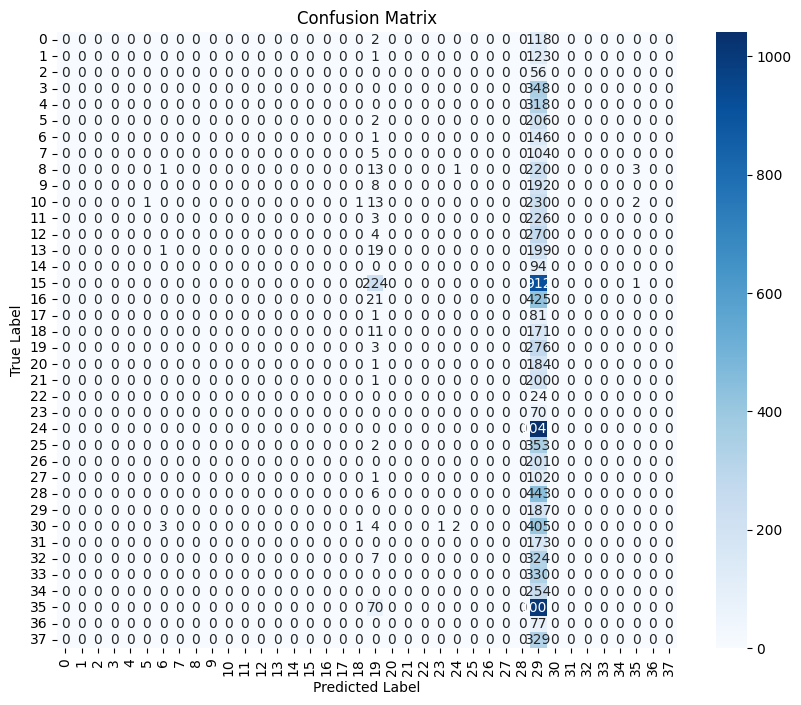

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       120
           1       1.00      0.00      0.00       124
           2       1.00      0.00      0.00        56
           3       1.00      0.00      0.00       348
           4       1.00      0.00      0.00       318
           5       0.00      0.00      0.00       208
           6       0.00      0.00      0.00       147
           7       1.00      0.00      0.00       109
           8       1.00      0.00      0.00       238
           9       1.00      0.00      0.00       200
          10       1.00      0.00      0.00       247
          11       1.00      0.00      0.00       229
          12       1.00      0.00      0.00       274
          13       1.00      0.00      0.00       219
          14       1.00      0.00      0.00        94
          15       1.00      0.00      0.00      1137
          16       1.00      0.00      0.00       446
    

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Disable retracing warnings
tf.config.run_functions_eagerly(True)

# Assuming predictions is the output of model.predict(test_ds)
predictions = model.predict(test_ds)

# Get the predicted labels and true labels
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = np.concatenate([label.numpy() for _, label in test_ds], axis=0)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Generate a classification report with zero_division parameter
class_report = classification_report(true_labels, predicted_labels, zero_division=1)

# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(38), yticklabels=range(38))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:")
print(class_report)
